In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [3]:
def sigmoid(Z):
    """Sigmoid activation
    Returns A, cache (Z) for backprop
    """
    A = 1 / (1 + np.exp(-Z))
    return A, Z




def relu(Z):
    A = np.maximum(0, Z)
    return A, Z


In [4]:
#Parameter initialization
def Init_parameters(N_x, N_h, N_y):
    """Initialize parameters for 2-layer network.
    N_x: input features
    N_h: hidden units
    N_y: output units (1 for binary)
    Returns params dict with W1,b1,W2,b2
    """
    np.random.seed(1)
    W1 = np.random.randn(N_h, N_x) * np.sqrt(2. / N_x)
    b1 = np.zeros((N_h, 1))
    W2 = np.random.randn(N_y, N_h) * np.sqrt(1. / N_h)
    b2 = np.zeros((N_y, 1))


    params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return params


In [5]:
#Forward pass
def forward_pass(X, params):
    """Compute forward pass using ReLU in layer1 and sigmoid in layer2.
    X: input features shape (n_x, m)
    params: dictionary
    Returns A2 (prediction probs) and cache of intermediate values for backprop
    """
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']


    Z1 = W1.dot(X) + b1
    A1, cache1 = relu(Z1)


    Z2 = W2.dot(A1) + b2
    A2, cache2 = sigmoid(Z2)


    cache = {"X": X, "Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [6]:
#Cost function
def compute_cost(A2, Y):
    """Compute cross-entropy cost
    A2: predicted probabilities shape (1, m)
    Y: true labels shape (1, m)
    Returns scalar cost
    """
    m = Y.shape[1]
  
    eps = 1e-8
    cost = -1.0 / m * np.sum(Y * np.log(A2 + eps) + (1 - Y) * np.log(1 - A2 + eps))
    return np.squeeze(cost)

In [7]:
#Backward pass
def backward_pass(params, cache, Y):
    """Compute gradients for 2-layer network
    Returns grads dict with dW1, db1, dW2, db2
    """
    m = Y.shape[1]
    W1, W2 = params['W1'], params['W2']
    X = cache['X']
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']


    
    dZ2 = A2 - Y 
    dW2 = 1.0 / m * dZ2.dot(A1.T)
    db2 = 1.0 / m * np.sum(dZ2, axis=1, keepdims=True)



    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = 1.0 / m * dZ1.dot(X.T)
    db1 = 1.0 / m * np.sum(dZ1, axis=1, keepdims=True)


    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [8]:
#Fit (gradient descent)
def fit(X, Y, N_h=8, num_iterations=2000, learning_rate=0.01, print_every=200, seed=1):
    """Train 2-layer neural network using gradient descent.
    X shape: (n_x, m)
    Y shape: (1, m)
    Returns trained params and history (losses)
    """
    np.random.seed(seed)
    n_x = X.shape[0]
    params = Init_parameters(n_x, N_h, 1)


    losses = []
    for i in range(num_iterations + 1):
        A2, cache = forward_pass(X, params)
        cost = compute_cost(A2, Y)
        grads = backward_pass(params, cache, Y)

        params['W1'] -= learning_rate * grads['dW1']
        params['b1'] -= learning_rate * grads['db1']
        params['W2'] -= learning_rate * grads['dW2']
        params['b2'] -= learning_rate * grads['db2']


        if i % print_every == 0:
            print(f"Iteration {i}: cost = {cost:.6f}")
        if i % 10 == 0:
            losses.append(cost)


    history = {"losses": losses}
    return params, history

In [9]:
#Utility: predict 
def predict(X, params, threshold=0.5):
    A2, _ = forward_pass(X, params)
    return (A2 > threshold).astype(int), A2

In [10]:
 #Dataset loading and preprocessing

df = pd.read_csv("dataset/BostonHousing.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


crim      – per capita crime rate by town
zn        – proportion of residential land zoned for large lots
indus     – proportion of non-retail business acres
chas      – Charles River dummy variable (1 if tract bounds river, else 0)
nox       – nitrogen oxides concentration
rm        – average number of rooms per dwelling
age       – proportion of owner-occupied units built before 1940
dis       – weighted distance to employment centers
rad       – index of accessibility to radial highways
tax       – property-tax rate
ptratio   – pupil–teacher ratio
b         – 1000(Bk − 0.63)² where Bk is the proportion of Black residents
lstat     – % lower-status population
medv      – median value of owner-occupied homes (in $1000s)

In [13]:

median_value = df['medv'].median()
df['medv_binary'] = (df['medv'] >= median_value).astype(int)


X = df.drop(columns=['medv', 'medv_binary']).values.T  
Y = df['medv_binary'].values.reshape(1, -1)          

In [14]:
#Split dataset: 80% train, 20% test

X_train, X_test, Y_train, Y_test = train_test_split(
    X.T, Y.T, test_size=0.2, random_state=42, stratify=Y.T
)

In [15]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.T).T
X_test = scaler.transform(X_test.T).T

In [16]:
#Train 2-layer neural network with different hidden layer sizes
hidden_layer_sizes = [4, 8, 16] 
results = {}

for N_h in hidden_layer_sizes:
    print(f"\nTraining with hidden layer size = {N_h}")

   
    params, history = fit(
        X_train, Y_train, N_h=N_h, num_iterations=2000, learning_rate=0.01, print_every=500
    )


    Y_train_pred, _ = predict(X_train, params)
    Y_test_pred, _ = predict(X_test, params)

    train_acc = accuracy_score(Y_train.flatten(), Y_train_pred.flatten())
    test_acc = accuracy_score(Y_test.flatten(), Y_test_pred.flatten())

    results[N_h] = {
        "params": params,
        "train_acc": train_acc,
        "test_acc": test_acc,
        "loss_history": history['losses']
    }

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")


Training with hidden layer size = 4
Iteration 0: cost = 0.590090
Iteration 500: cost = 0.489072
Iteration 1000: cost = 0.440806
Iteration 1500: cost = 0.405387
Iteration 2000: cost = 0.367598
Train Accuracy: 0.8564
Test Accuracy: 0.8431

Training with hidden layer size = 8
Iteration 0: cost = 0.580724
Iteration 500: cost = 0.422460
Iteration 1000: cost = 0.338812
Iteration 1500: cost = 0.295972
Iteration 2000: cost = 0.275387
Train Accuracy: 0.8762
Test Accuracy: 0.8725

Training with hidden layer size = 16
Iteration 0: cost = 0.757415
Iteration 500: cost = 0.382679
Iteration 1000: cost = 0.319671
Iteration 1500: cost = 0.286744
Iteration 2000: cost = 0.268840
Train Accuracy: 0.8886
Test Accuracy: 0.8725


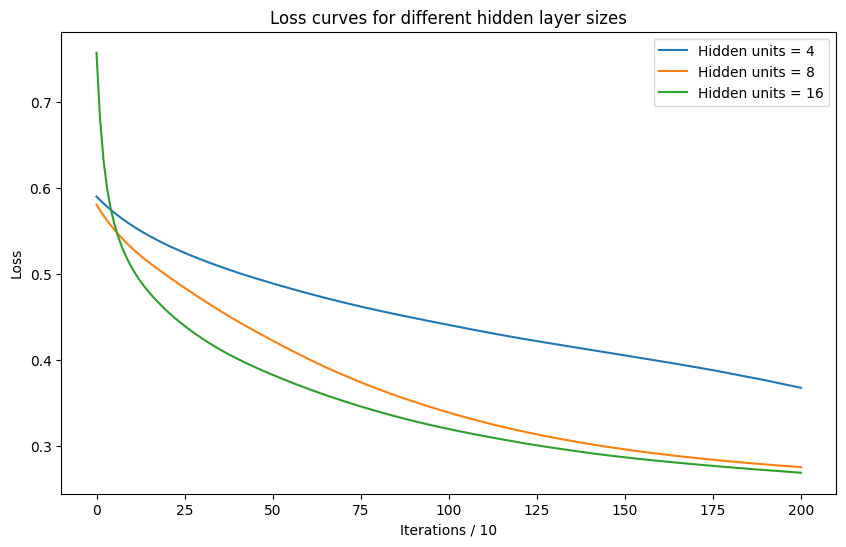

In [17]:
#Plot loss curves for all hidden layer sizes
plt.figure(figsize=(10,6))
for N_h, res in results.items():
    plt.plot(res['loss_history'], label=f'Hidden units = {N_h}')
plt.xlabel("Iterations / 10")
plt.ylabel("Loss")
plt.title("Loss curves for different hidden layer sizes")
plt.legend()
plt.show()

In [18]:
#Confusion matrix and classification report for best model
best_N_h = max(results, key=lambda k: results[k]['test_acc'])
best_params = results[best_N_h]['params']
Y_test_pred, _ = predict(X_test, best_params)

print(f"Best model hidden layer size: {best_N_h}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test.flatten(), Y_test_pred.flatten()))
print("\nClassification Report:")
print(classification_report(Y_test.flatten(), Y_test_pred.flatten()))

Best model hidden layer size: 8

Confusion Matrix:
[[44  7]
 [ 6 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.87      0.88      0.87        51

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102



In [19]:
summary_data = []
for N_h, res in results.items():
    summary_data.append({
        "Hidden Layer Size": N_h,
        "Train Accuracy": res['train_acc'],
        "Test Accuracy": res['test_acc']
    })

summary_table = pd.DataFrame(summary_data)

summary_table = summary_table.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)


print("\nSummary Table:")
print(summary_table)


Summary Table:
   Hidden Layer Size  Train Accuracy  Test Accuracy
0                  8        0.876238       0.872549
1                 16        0.888614       0.872549
2                  4        0.856436       0.843137
